In [14]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, r2_score
import joblib

In [8]:
dataset_train = pd.read_csv("/home/tintin/Study/Data-science/Statistical-machine-learning/Learn-Logistic-Linear-Regression/Datasets/Social_Network_Ads_Train.csv")
dataset_test = pd.read_csv("/home/tintin/Study/Data-science/Statistical-machine-learning/Learn-Logistic-Linear-Regression/Datasets/Social_Network_Ads_Test.csv")
dataset_train

,Unnamed: 0,User ID,Gender,Age,EstimatedSalary,Purchased
0,0,15624510,Male,19,19000,0
1,1,15810944,Male,35,20000,0
2,2,15668575,Female,26,43000,0
3,3,15603246,Female,27,57000,0
4,4,15804002,Male,19,76000,0
...,...,...,...,...,...,...
295,295,15725794,Female,36,63000,0
296,296,15673539,Male,42,73000,1
297,297,15705298,Female,43,112000,1
298,298,15675791,Male,45,79000,0


In [9]:
X_train = dataset_train.iloc[:,[3,4]].values
Y_train = dataset_train.iloc[:,5].values
X_test = dataset_test.iloc[:,[3,4]].values
Y_test = dataset_test.iloc[:,5].values

In [10]:
SC = StandardScaler()
X_train = SC.fit_transform(X_train)
X_test = SC.fit_transform(X_test)

/home/tintin/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/tintin/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/tintin/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/tintin/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [11]:
def VisualizingDataset(X_, Y_):
    X1 = X_[:, 0]
    X2 = X_[:, 1]
    for i, label in enumerate(np.unique(Y_)):
        plt.scatter(X1[Y_ == label], X2[Y_ == label],
            color = ListedColormap(("red", "green"))(i),
            label = label)

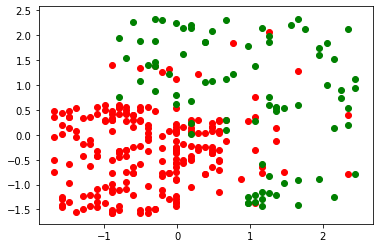

In [12]:
VisualizingDataset(X_train, Y_train)
plt.show()

In [15]:
classifier = LogisticRegression(random_state= 0)
classifier.fit(X_train, Y_train)

/home/tintin/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [16]:
cm = confusion_matrix(Y_train, classifier.predict(X_train))
print(cm)

[[207  12]
 [ 31  50]]


In [19]:
def VisualizingResult(model, X_):
    X1 = X_[:, 0]
    X2 = X_[:, 1]
    X1_range = np.arange(start= X1.min()-1, stop= X1.max()+1, step = 0.01)
    X2_range = np.arange(start= X2.min()-1, stop= X2.max()+1, step = 0.01)
    X1_matrix, X2_matrix = np.meshgrid(X1_range, X2_range)
    X_grid= np.array([X1_matrix.ravel(), X2_matrix.ravel()]).T
    Y_grid= model.predict(X_grid).reshape(X1_matrix.shape)
    plt.contourf(X1_matrix, X2_matrix, Y_grid, alpha = 0.5, cmap = ListedColormap(("red", "green")))

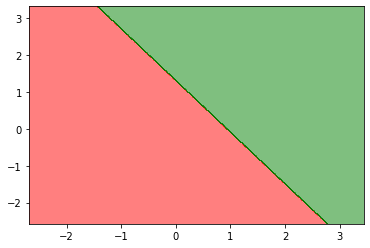

In [20]:
VisualizingResult(classifier, X_train)
plt.show()

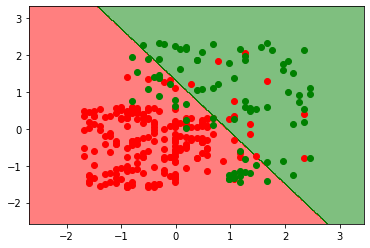

In [21]:
VisualizingResult(classifier, X_train)
VisualizingDataset(X_train, Y_train)
plt.show()

In [22]:
cm = confusion_matrix(Y_test, classifier.predict(X_test))
print(cm)

[[37  1]
 [36 26]]


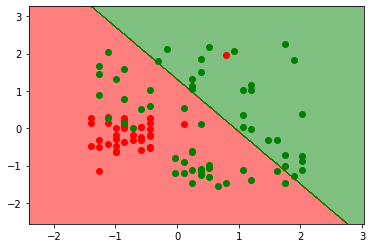

In [23]:
VisualizingResult(classifier, X_test)
VisualizingDataset(X_test, Y_test)
plt.show()

In [24]:
def compare(i_example):
    x = X_test[i_example : i_example + 1]
    y = Y_test[i_example]
    y_pred = classifier.predict(x)
    x_inv = SC.inverse_transform(x)
    print(x_inv, y, y_pred)

In [25]:
for i in range(7, 12):
    compare(i)

[[4.70e+01 1.13e+05]] 1 [1]
[[3.60e+01 1.25e+05]] 1 [0]
[[3.8e+01 5.0e+04]] 0 [0]
[[4.2e+01 7.0e+04]] 0 [0]
[[3.9e+01 9.6e+04]] 1 [0]
